In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 로드 및 전처리

In [2]:
btc_df = pd.read_csv('./data/BTC_USD.csv')
snp_df = pd.read_csv('./data/snp500.csv')

In [3]:
snp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23970 entries, 0 to 23969
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          23970 non-null  object 
 1   Open          23970 non-null  float64
 2   High          23970 non-null  float64
 3   Low           23970 non-null  float64
 4   Close         23970 non-null  float64
 5   Volume        23970 non-null  int64  
 6   Dividends     23970 non-null  float64
 7   Stock Splits  23970 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 1.5+ MB


In [4]:
btc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4665 entries, 0 to 4664
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      4665 non-null   object
 1   Price     4665 non-null   object
 2   Open      4665 non-null   object
 3   High      4665 non-null   object
 4   Low       4665 non-null   object
 5   Vol.      4069 non-null   object
 6   Change %  4665 non-null   object
dtypes: object(7)
memory usage: 255.2+ KB


In [5]:
def clean_and_convert(df):
    for col in df.columns:
        if col != 'Date':
            # Object 타입을 각각의 맞는 타입으로 변경
            if df[col].dtype == 'O':

                # 숫자와 문자로 이루어져 있어 해당 데이터를 숫자로 변경하기 위한 작업
                if col == 'Vol.':
                    df[col] = df[col].replace({'K': '*1e3', 'M': '*1e6'}, regex=True)
                    df[col] = df[col].apply(lambda x: eval(str(x)) if isinstance(x, str) else x)
                
                elif col == 'Change %':
                    df[col] = df[col].str.replace('%', '', regex=True) 
                    
                df[col] = df[col].astype(str)
                df[col] = df[col].str.replace(',', '', regex=True) 
            
            df[col] = pd.to_numeric(df[col], errors='coerce')
    return df

In [6]:
btc_df = clean_and_convert(btc_df)
btc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4665 entries, 0 to 4664
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      4665 non-null   object 
 1   Price     4665 non-null   float64
 2   Open      4665 non-null   float64
 3   High      4665 non-null   float64
 4   Low       4665 non-null   float64
 5   Vol.      4069 non-null   float64
 6   Change %  4665 non-null   float64
dtypes: float64(6), object(1)
memory usage: 255.2+ KB


In [7]:
# UTC 시간대 통일
snp_df['Date'] = pd.to_datetime(snp_df['Date'], errors='coerce', utc=True)
btc_df['Date'] = pd.to_datetime(btc_df['Date'], errors='coerce', utc=True)

# 시간대 제거
snp_df['Date'] = pd.to_datetime(snp_df['Date'], errors='coerce').dt.tz_localize(None)
btc_df['Date'] = pd.to_datetime(btc_df['Date'], errors='coerce').dt.tz_localize(None)


In [8]:
btc_df['Price'] = (btc_df['High'] + btc_df['Low']) / 2
snp_df['Price'] = (snp_df['High'] + snp_df['Low']) / 2

In [9]:
snp_df.describe()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Price
count,23970,23970.000000,23970.000000,23970.000000,23970.000000,2.397000e+04,23970.0,23970.0,23970.000000
mean,1975-10-19 01:08:18.773466848,565.155536,588.712980,581.470939,585.323645,8.698602e+08,0.0,0.0,585.091959
min,1927-12-30 05:00:00,0.000000,4.400000,4.400000,4.400000,0.000000e+00,0.0,0.0,4.400000
25%,1951-12-28 23:00:00,9.540000,24.440001,24.440001,24.440001,1.440000e+06,0.0,0.0,24.440001
50%,1975-11-20 17:00:00,40.684999,102.180000,100.580002,101.405003,1.917500e+07,0.0,0.0,101.397499
75%,1999-08-09 22:00:00,961.247513,970.832520,951.692520,962.402512,8.148750e+08,0.0,0.0,960.589996
max,2023-06-02 04:00:00,4804.509766,4818.620117,4780.040039,4796.560059,1.145623e+10,0.0,0.0,4796.445068
std,NaN,941.065938,935.183705,923.945440,929.927708,1.591868e+09,0.0,0.0,929.552987


In [10]:
btc_df.describe()

,Date,Price,Open,High,Low,Vol.,Change %
count,4665,4665.000000,4665.000000,4665.000000,4665.000000,4069.000000,4665.000000
mean,2018-08-28 03:08:36.270096384,16135.995723,16141.718950,16508.115520,15763.875927,13484.025559,0.295576
min,2012-04-06 00:00:00,4.700000,4.700000,4.700000,4.700000,0.000000,-38.180000
25%,2015-06-18 00:00:00,438.050000,439.000000,446.500000,430.500000,1790.000000,-1.260000
50%,2018-08-29 00:00:00,6606.350000,6627.300000,6778.300000,6511.500000,6010.000000,0.110000
75%,2021-11-07 00:00:00,26491.500000,26365.000000,26804.000000,26018.000000,16370.000000,1.800000
max,2025-01-16 00:00:00,106620.000000,106000.000000,108080.000000,105160.000000,274850.000000,36.150000
std,NaN,21754.264747,21760.281382,22224.553365,21290.305761,20144.169481,4.076950


In [11]:
btc_df['Date'] = pd.to_datetime(btc_df['Date']).dt.date
snp_df['Date'] = pd.to_datetime(snp_df['Date']).dt.date

In [12]:
# 겹치는 날짜 범위 확인
snp_start, snp_end = snp_df['Date'].min(), snp_df['Date'].max()
btc_start, btc_end = btc_df['Date'].min(), btc_df['Date'].max()

# 공통 날짜 범위 설정
common_start = max(snp_start, btc_start)
common_end = min(snp_end, btc_end)

print(f"공통 날짜 범위: {common_start} ~ {common_end}")


공통 날짜 범위: 2012-04-06 ~ 2023-06-02


In [13]:
common_dates = pd.merge(
    snp_df[['Date', 'Price']], 
    btc_df[['Date', 'Price']], 
    on='Date', 
    suffixes=('_snp', '_btc')
)

# 병합 결과 확인
print(common_dates.head())
print(f"공통 데이터 개수: {len(common_dates)}")

         Date    Price_snp  Price_btc
0  2012-04-09  1387.844971        4.9
1  2012-04-10  1370.195007        4.8
2  2012-04-11  1366.844971        4.9
3  2012-04-12  1378.450012        4.9
4  2012-04-13  1378.729980        4.9
공통 데이터 개수: 2806


# 공통 사용 함수 생성

In [14]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 모델 성능 평가 모델
def evaluate_model(actual, predicted, label):
    mae = mean_absolute_error(actual, predicted)
    rmse = np.sqrt(mean_squared_error(actual, predicted))
    r2 = r2_score(actual, predicted)
    print(f"{label} Prediction Metrics:")
    print(f"  MAE  : {mae:.4f}")
    print(f"  RMSE : {rmse:.4f}")
    print(f"  R²   : {r2:.4f}")
    print()

In [15]:
# 시각화
def plot_predictions_with_time(date_index, actual, predicted, title):
    plt.figure(figsize=(14, 7))
    plt.plot(date_index, actual, label="Actual", marker='o', linestyle='-', alpha=0.7)
    plt.plot(date_index, predicted, label="Predicted", marker='x', linestyle='--', alpha=0.7)
    plt.title(title)
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def plot_residuals(date_index, actual, predicted, title):
    residuals = actual.values - predicted
    plt.figure(figsize=(14, 7))
    plt.plot(date_index, residuals, label="Residuals (Actual - Predicted)", color='red', marker='o', alpha=0.7)
    plt.axhline(0, color='black', linestyle='--', alpha=0.5)
    plt.title(title)
    plt.xlabel("Date")
    plt.ylabel("Residuals")
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# LGBM 모델을 사용한 예측

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000070 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 2244, number of used features: 1
[LightGBM] [Info] Start training from score 4395.173620
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000039 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 2244, number of used features: 1
[LightGBM] [Info] Start training from score 2329.999443
BTC Prediction Metrics:
  MAE  : 13570.6783
  RMSE : 16148.7583
  R²   : -0.3708

SNP Prediction Metrics:
  MAE  : 448.2787
  RMSE : 501.1798
  R²   : -2.2996



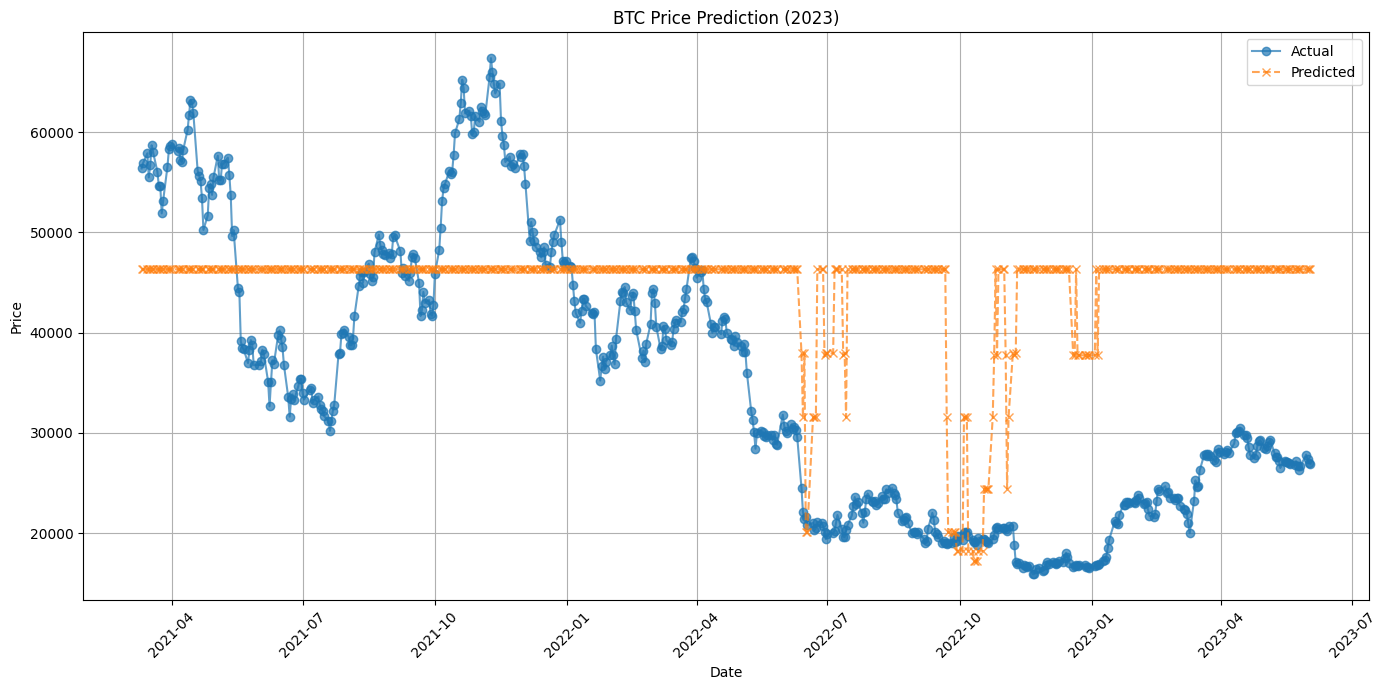

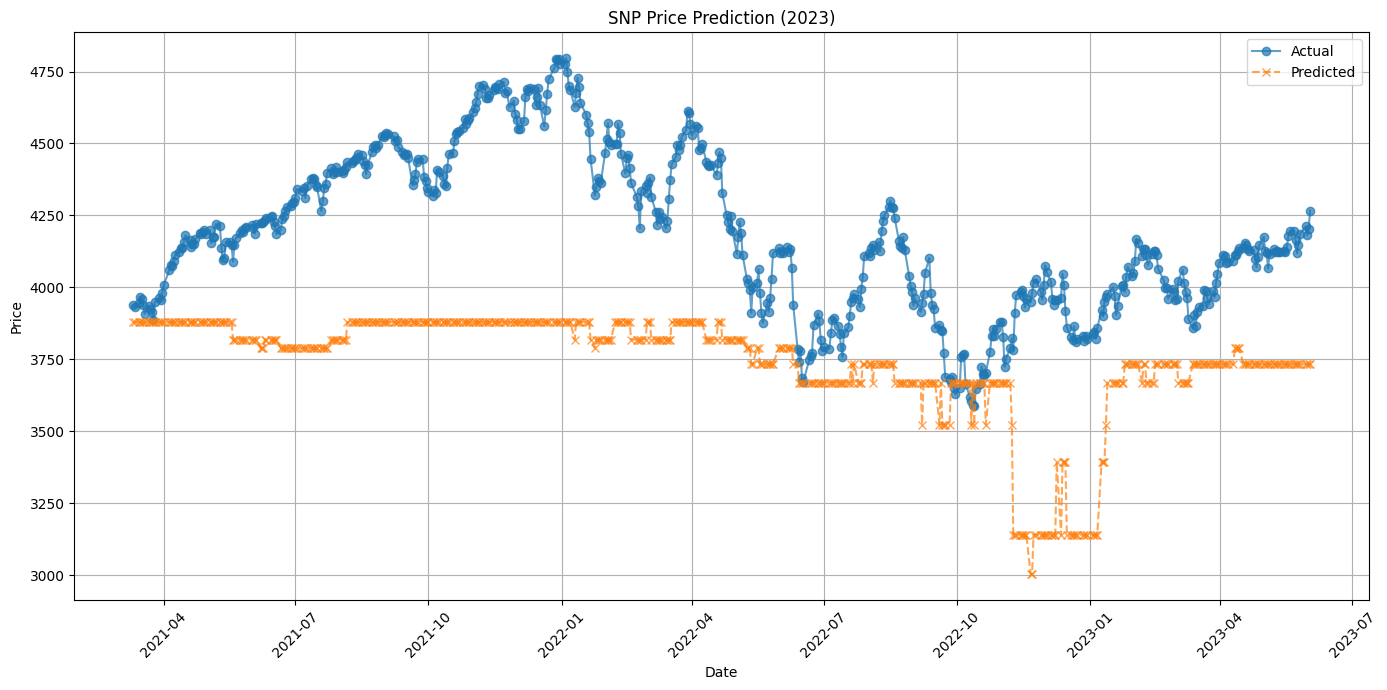

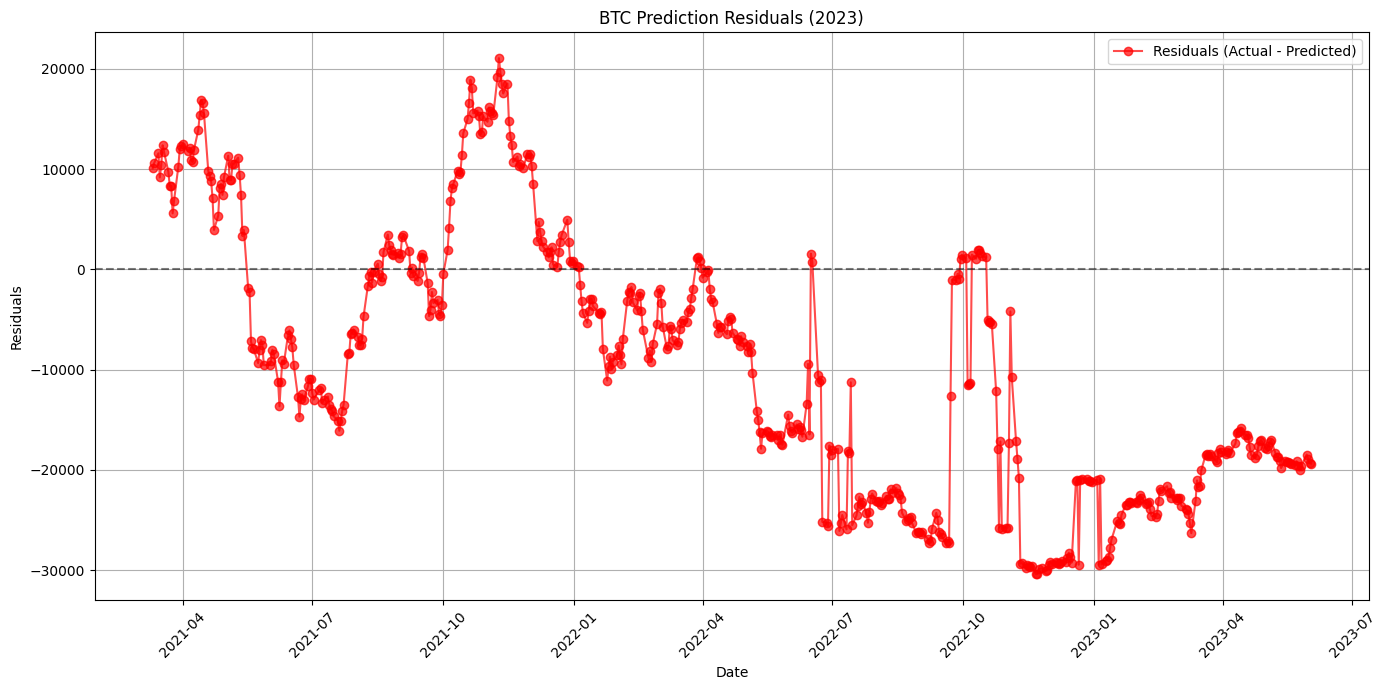

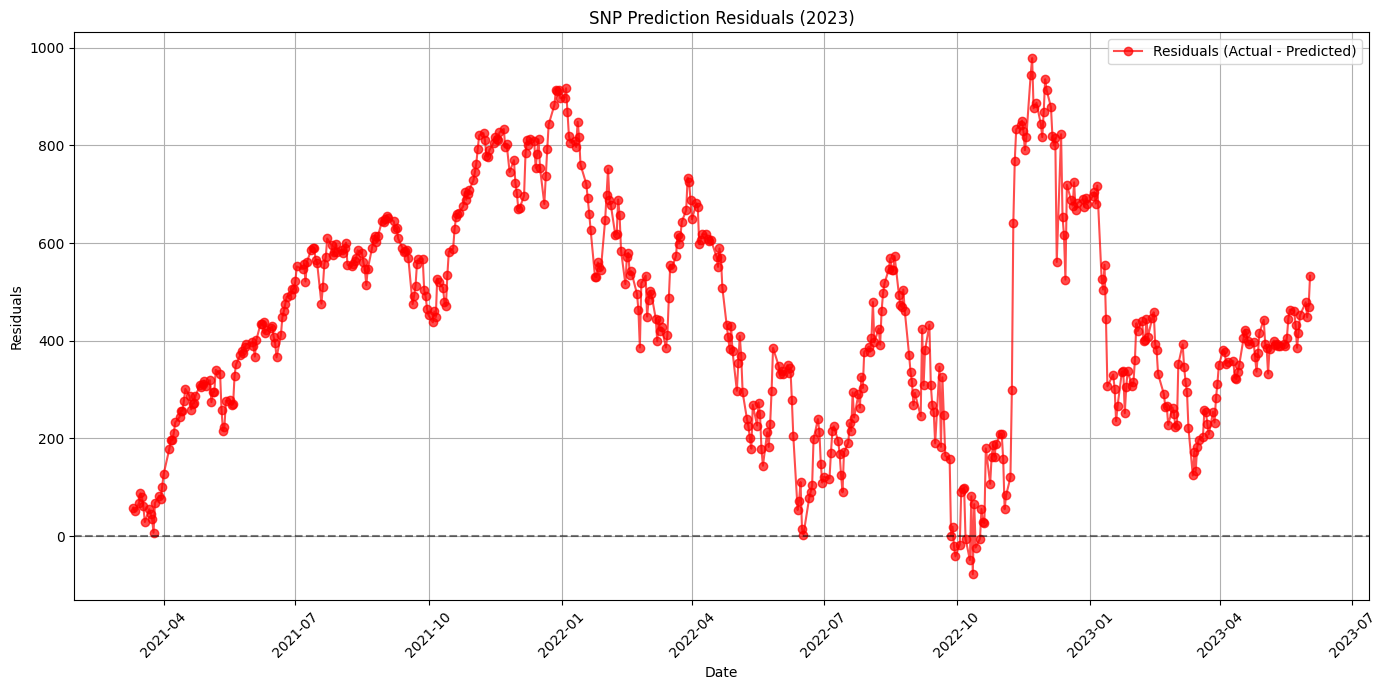

In [16]:
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split

# 날짜 전처리
common_dates['Date'] = pd.to_datetime(common_dates['Date'])
common_dates = common_dates.sort_values(by='Date').reset_index(drop=True)

# 학습-테스트 데이터 분리
X_btc = common_dates.drop(['Date', 'Price_btc'], axis=1)
y_btc = common_dates['Price_btc']

X_snp = common_dates.drop(['Date', 'Price_snp'], axis=1)
y_snp = common_dates['Price_snp']

X_train_btc, X_test_btc, y_train_btc, y_test_btc = train_test_split(X_btc, y_btc, test_size=0.2, random_state=42, shuffle=False)
X_train_snp, X_test_snp, y_train_snp, y_test_snp = train_test_split(X_snp, y_snp, test_size=0.2, random_state=42, shuffle=False)

btc_test_dates = common_dates.iloc[X_test_btc.index]['Date']
snp_test_dates = common_dates.iloc[X_test_snp.index]['Date']

# 모델 생성 및 학습
btc_model = LGBMRegressor(random_state=42)
snp_model = LGBMRegressor(random_state=42)

btc_model.fit(X_train_btc, y_train_btc)
snp_model.fit(X_train_snp, y_train_snp)

# 예측
btc_preds = btc_model.predict(X_test_btc)
snp_preds = snp_model.predict(X_test_snp)

# 평가
evaluate_model(y_test_btc, btc_preds, label="BTC")
evaluate_model(y_test_snp, snp_preds, label="SNP")

# 시각화
plot_predictions_with_time(btc_test_dates, y_test_btc, btc_preds, title="BTC Price Prediction (2023)")
plot_predictions_with_time(snp_test_dates, y_test_snp, snp_preds, title="SNP Price Prediction (2023)")
plot_residuals(btc_test_dates, y_test_btc, btc_preds, title="BTC Prediction Residuals (2023)")
plot_residuals(snp_test_dates, y_test_snp, snp_preds, title="SNP Prediction Residuals (2023)")

- 두 모델의 R2 스코어가 음수로 나타났것은 데이터의 패턴을 잘 학습하지 못한 것으로, 해당 모델은 과거의 데이터를 고려하지 않고 단순히 현재 시점의 독립 변수만을 사용하여 학습한 결과로 나타난다.

- Light Gradient Boosting 모델은 feature와 target의 관계를 학습시키는 것에 적합하지만, 시간 종속성을 고려하지 않으면, 시계열 데이터의 구조적 관계를 이해할 수 없다.

---

# lag 기반 LGBM 모델 예측

In [17]:
# 과거 데이터 기반의 lag features 생성 함수
def create_lag_features(df, target_col, lags=5):
    for lag in range(1, lags + 1):
        df[f"{target_col}_lag_{lag}"] = df[target_col].shift(lag)
    return df

In [18]:
# 날짜 기반 데이터 기준 분리 함수
def train_test_split_data(date):
    train_data = common_dates[common_dates['Date'] < date]
    test_data = common_dates[common_dates['Date'] >= date]
    return train_data, test_data

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000203 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2805
[LightGBM] [Info] Number of data points in the train set: 2450, number of used features: 11
[LightGBM] [Info] Start training from score 8119.081793
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000287 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2805
[LightGBM] [Info] Number of data points in the train set: 2450, number of used features: 11
[LightGBM] [Info] Start training from score 2501.360515
BTC Prediction Metrics:
  MAE  : 2808.1336
  RMSE : 3358.6383
  R²   : 0.8576

SNP Prediction Metrics:
  MAE  : 57.7990
  RMSE : 73.6298
  R²   : 0.9134



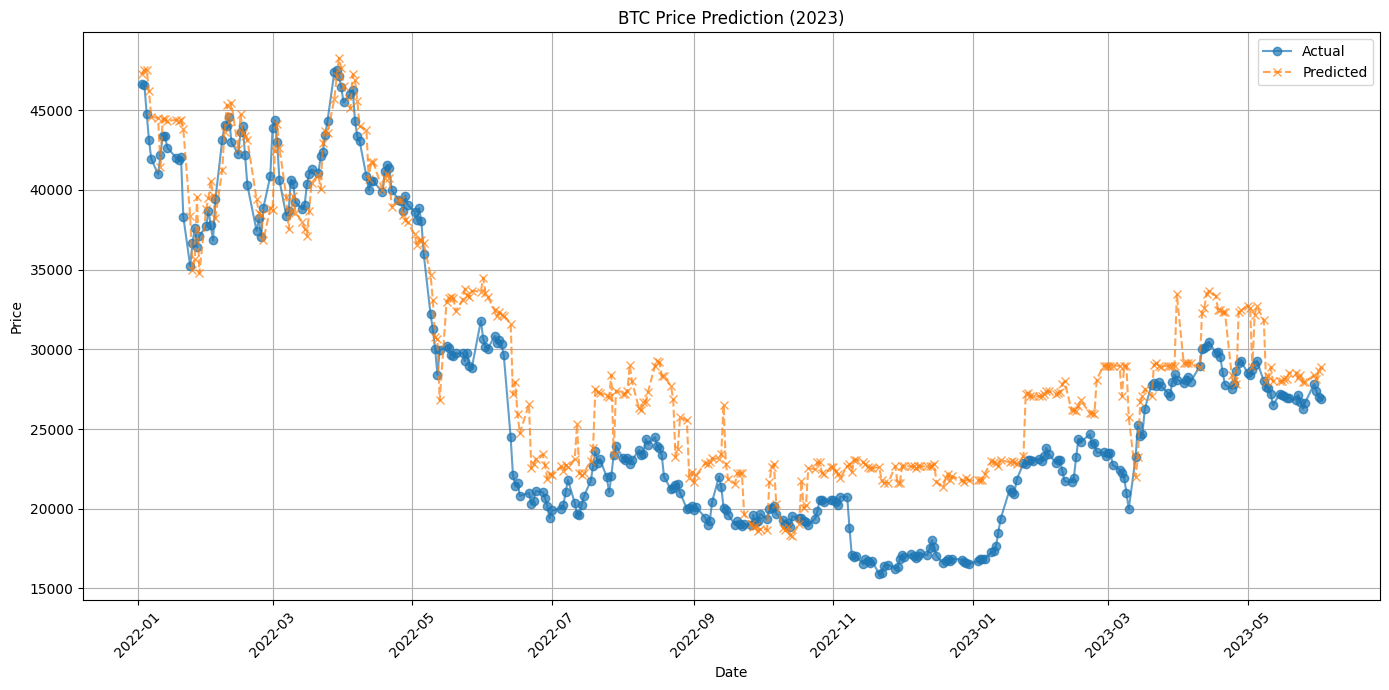

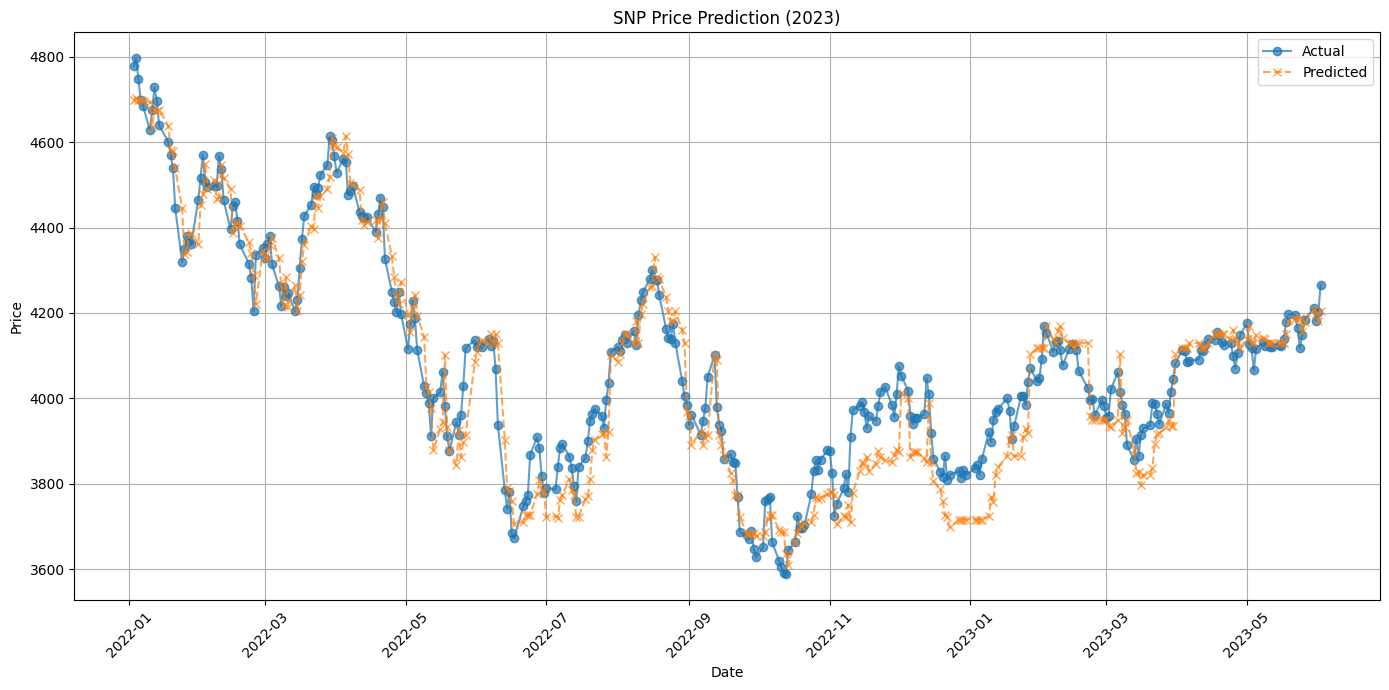

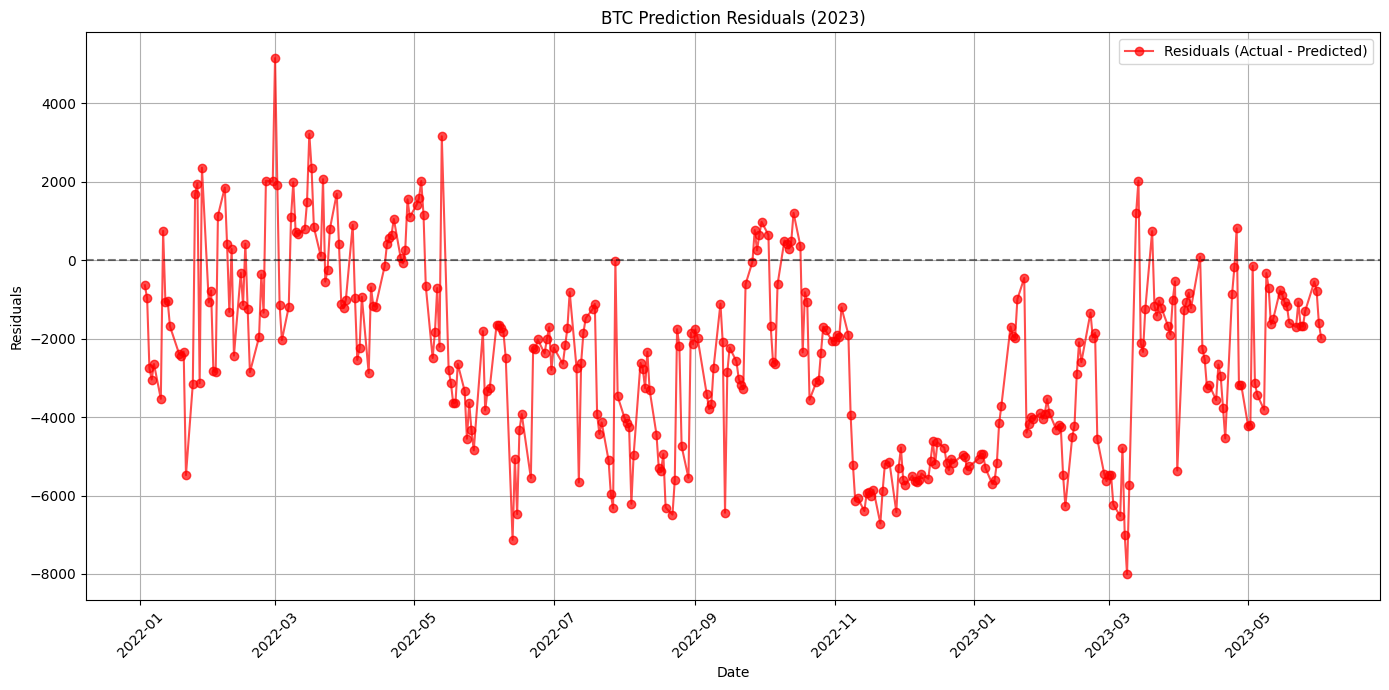

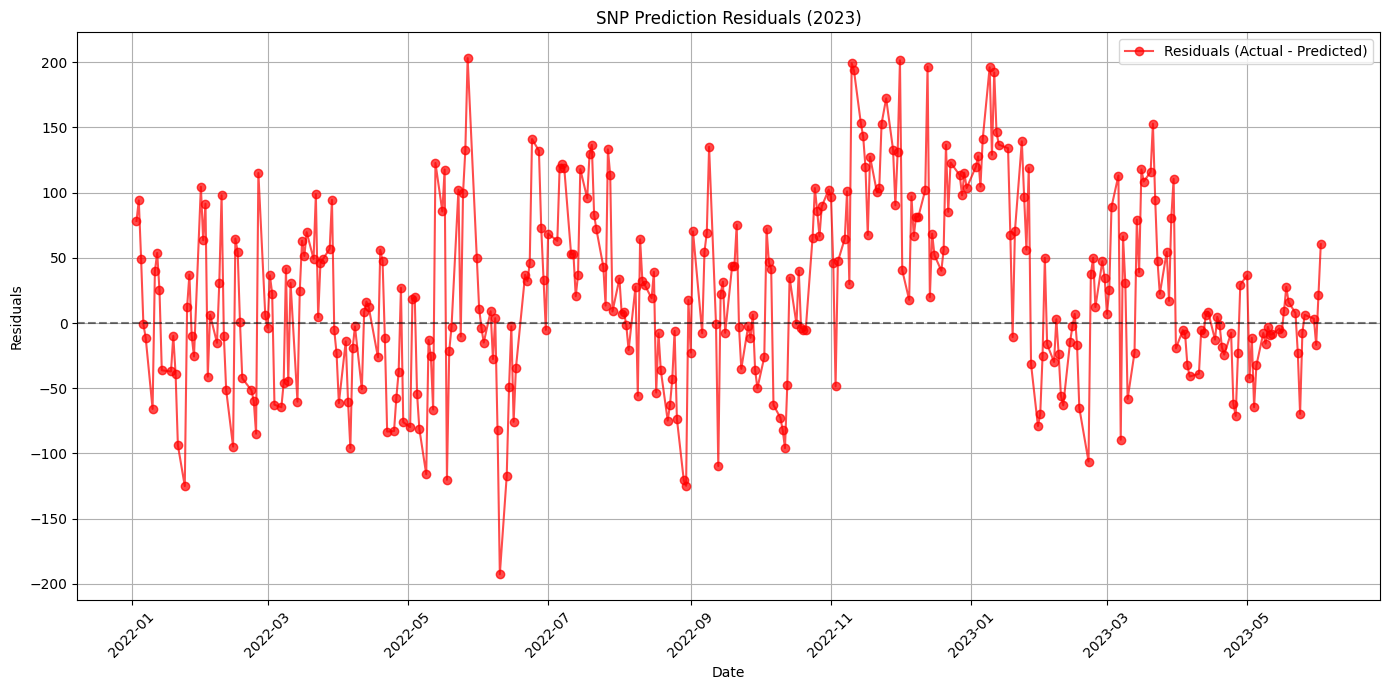

In [19]:
lags = 5
common_dates = create_lag_features(common_dates, 'Price_btc', lags)
common_dates = create_lag_features(common_dates, 'Price_snp', lags)

# 데이터 분리
train_data, test_data = train_test_split_data('2022-01-01')

X_train_btc = train_data.drop(['Date', 'Price_btc'], axis=1)
y_train_btc = train_data['Price_btc']
X_test_btc = test_data.drop(['Date', 'Price_btc'], axis=1)
y_test_btc = test_data['Price_btc']

X_train_snp = train_data.drop(['Date', 'Price_snp'], axis=1)
y_train_snp = train_data['Price_snp']
X_test_snp = test_data.drop(['Date', 'Price_snp'], axis=1)
y_test_snp = test_data['Price_snp']

# 모델 학습
btc_model = LGBMRegressor(random_state=42)
snp_model = LGBMRegressor(random_state=42)
btc_model.fit(X_train_btc, y_train_btc)
snp_model.fit(X_train_snp, y_train_snp)

# 예측
btc_preds = btc_model.predict(X_test_btc)
snp_preds = snp_model.predict(X_test_snp)

# 모델 평가
evaluate_model(y_test_btc, btc_preds, label="BTC")
evaluate_model(y_test_snp, snp_preds, label="SNP")


# 예측 결과 시각화
btc_test_dates = test_data['Date']
snp_test_dates = test_data['Date']

plot_predictions_with_time(btc_test_dates, y_test_btc, btc_preds, title="BTC Price Prediction (2023)")
plot_predictions_with_time(snp_test_dates, y_test_snp, snp_preds, title="SNP Price Prediction (2023)")
plot_residuals(btc_test_dates, y_test_btc, btc_preds, title="BTC Prediction Residuals (2023)")
plot_residuals(snp_test_dates, y_test_snp, snp_preds, title="SNP Prediction Residuals (2023)")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001057 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8670
[LightGBM] [Info] Number of data points in the train set: 2450, number of used features: 34
[LightGBM] [Info] Start training from score 8119.081793
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000734 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8670
[LightGBM] [Info] Number of data points in the train set: 2450, number of used features: 34
[LightGBM] [Info] Start training from score 2501.360515
BTC Prediction Metrics:
  MAE  : 2316.3390
  RMSE : 2928.1944
  R²   : 0.8917

SNP Prediction Metrics:
  MAE  : 57.0460
  RMSE : 72.6490
  R²   : 0.9157



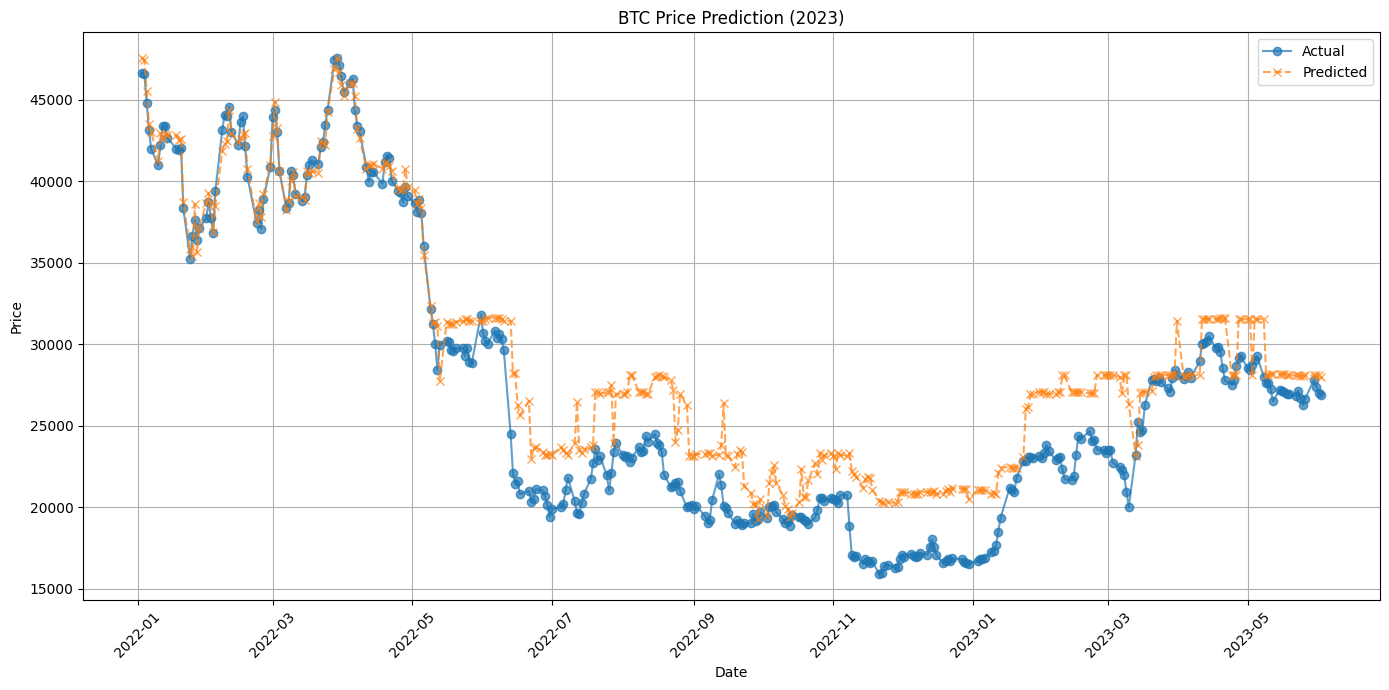

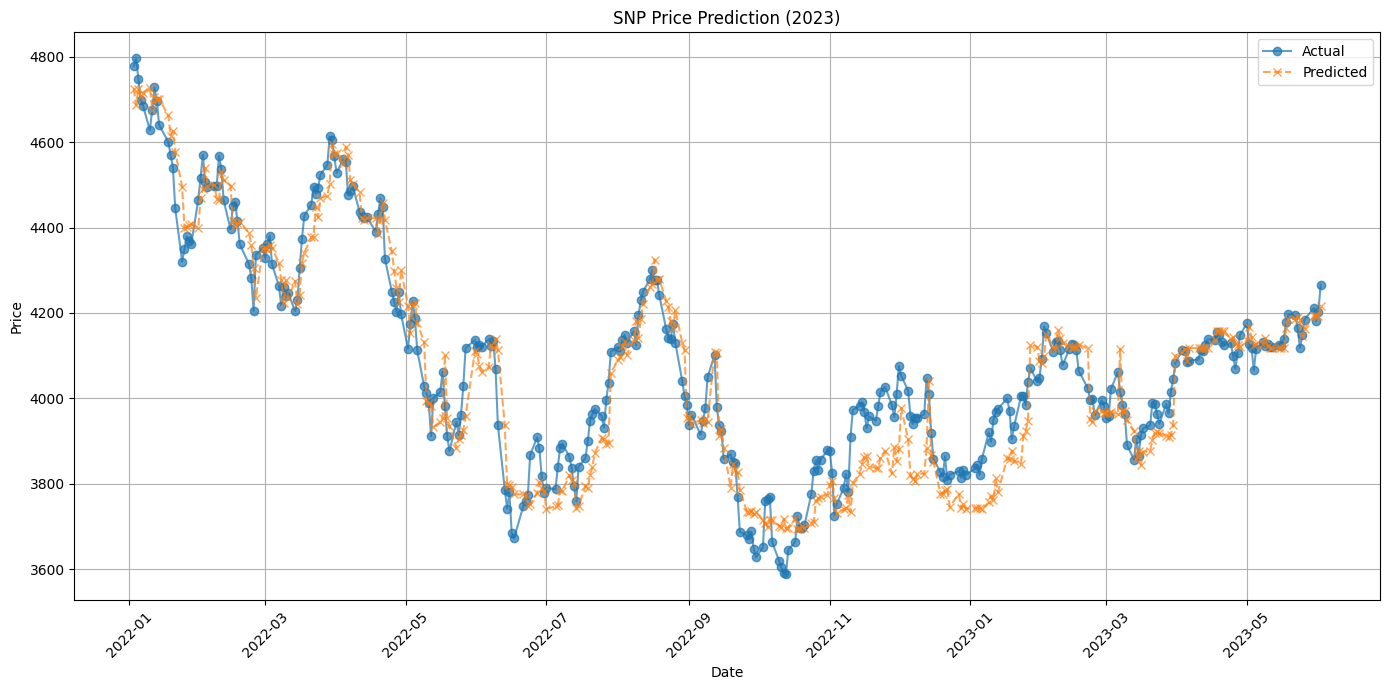

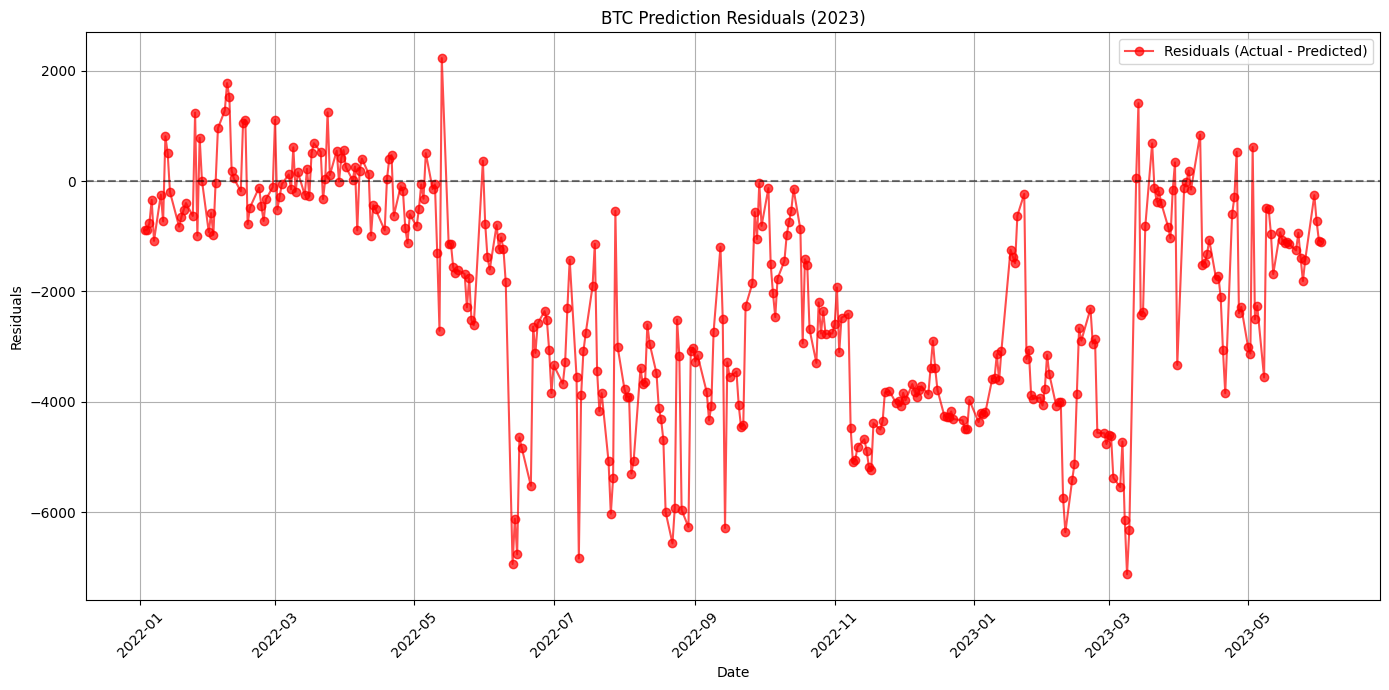

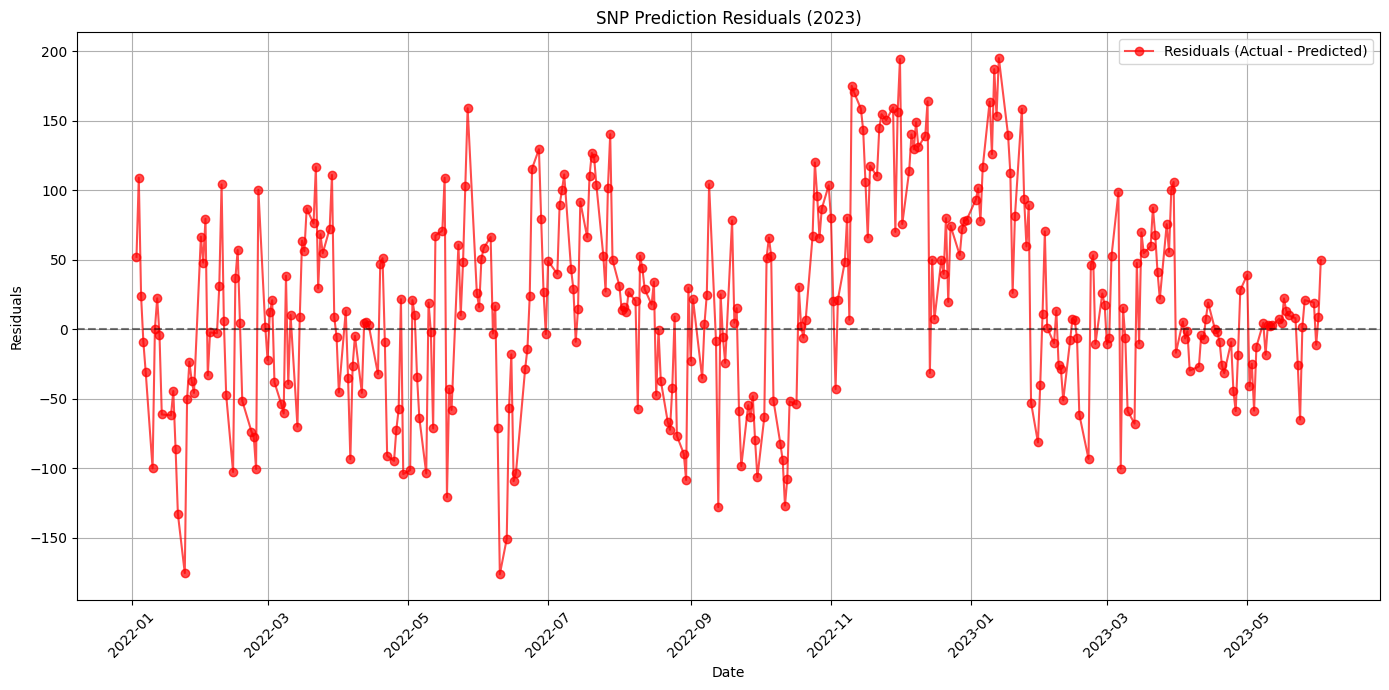

In [26]:
lags = 10
common_dates = create_lag_features(common_dates, 'Price_btc', lags)
common_dates = create_lag_features(common_dates, 'Price_snp', lags)

# 데이터 분리
train_data, test_data = train_test_split_data('2022-01-01')

X_train_btc = train_data.drop(['Date', 'Price_btc'], axis=1)
y_train_btc = train_data['Price_btc']
X_test_btc = test_data.drop(['Date', 'Price_btc'], axis=1)
y_test_btc = test_data['Price_btc']

X_train_snp = train_data.drop(['Date', 'Price_snp'], axis=1)
y_train_snp = train_data['Price_snp']
X_test_snp = test_data.drop(['Date', 'Price_snp'], axis=1)
y_test_snp = test_data['Price_snp']

# 모델 학습
btc_model = LGBMRegressor(random_state=42)
snp_model = LGBMRegressor(random_state=42)
btc_model.fit(X_train_btc, y_train_btc)
snp_model.fit(X_train_snp, y_train_snp)

# 예측
btc_preds = btc_model.predict(X_test_btc)
snp_preds = snp_model.predict(X_test_snp)

# 모델 평가
evaluate_model(y_test_btc, btc_preds, label="BTC")
evaluate_model(y_test_snp, snp_preds, label="SNP")


# 예측 결과 시각화
btc_test_dates = test_data['Date']
snp_test_dates = test_data['Date']

plot_predictions_with_time(btc_test_dates, y_test_btc, btc_preds, title="BTC Price Prediction (2023)")
plot_predictions_with_time(snp_test_dates, y_test_snp, snp_preds, title="SNP Price Prediction (2023)")
plot_residuals(btc_test_dates, y_test_btc, btc_preds, title="BTC Prediction Residuals (2023)")
plot_residuals(snp_test_dates, y_test_snp, snp_preds, title="SNP Prediction Residuals (2023)")

- Lag 변수를 사용함으로써 모델 성능이 크게 향상되어, LGBM에서 Lag 변수가 시계열 데이터 예측에서 매우 중요한 역할을 한다는 점을 알 수 있다.

---

# 하이퍼 파라미터 튜닝 및 feature 중요도 분석

Tuning BTC model...
Fitting 3 folds for each of 486 candidates, totalling 1458 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000427 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8925
[LightGBM] [Info] Number of data points in the train set: 2450, number of used features: 35
[LightGBM] [Info] Start training from score 7.207111
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positi

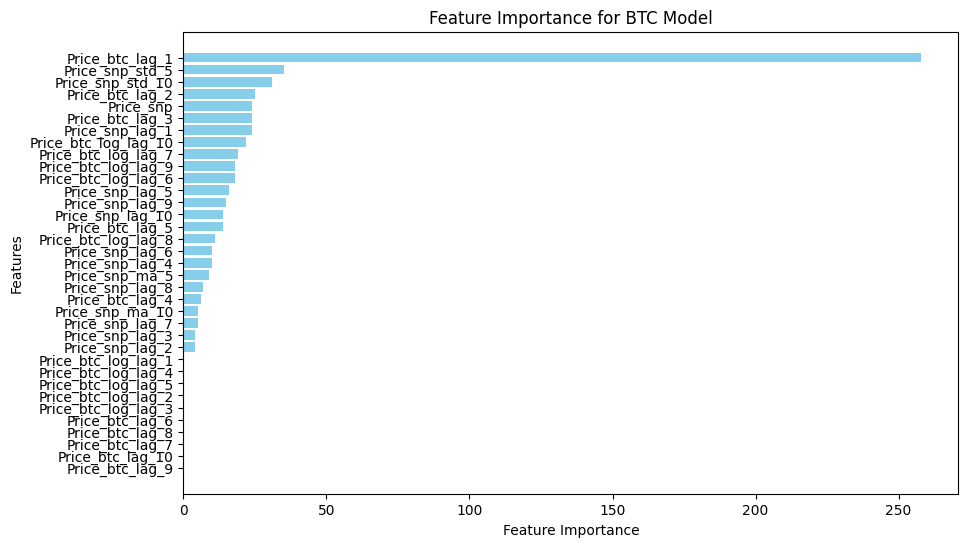

Tuning SNP model...
Fitting 3 folds for each of 486 candidates, totalling 1458 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000672 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9180
[LightGBM] [Info] Number of data points in the train set: 2450, number of used features: 36
[LightGBM] [Info] Start training from score 2501.360515
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with pos

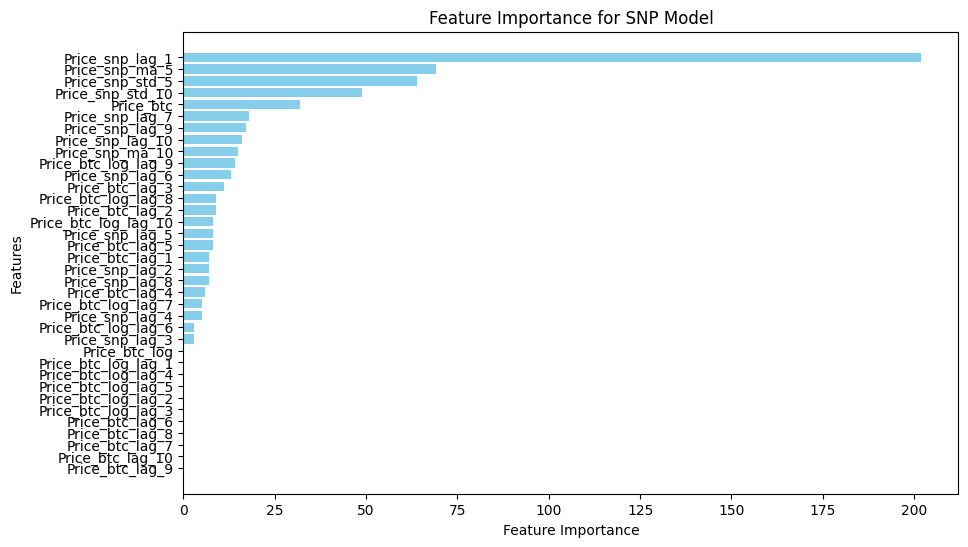

In [29]:
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import pandas as pd

# 하이퍼파라미터 튜닝
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'num_leaves': [15, 31, 63],
    'min_child_samples': [10, 20, 30],
    'subsample': [0.8, 1.0]
}

# GridSearchCV 설정
grid_search_btc = GridSearchCV(
    estimator=LGBMRegressor(random_state=42),
    param_grid=param_grid,
    cv=3,
    scoring='neg_mean_squared_error',
    verbose=1,
    n_jobs=-1
)

grid_search_btc.fit(X_train_btc, y_train_btc)

# 최적 하이퍼파라미터 출력
print("Best parameters for BTC model:")
print(grid_search_btc.best_params_)

# 최적의 모델로 예측
btc_model_optimized = grid_search_btc.best_estimator_
btc_preds_optimized = btc_model_optimized.predict(X_test_btc)

# 모델 평가
evaluate_model(y_test_btc, btc_preds_optimized, label="BTC (Optimized)")

# 피처 중요도 분석
feature_importance = pd.DataFrame({
    'Feature': X_train_btc.columns,
    'Importance': btc_model_optimized.feature_importances_
}).sort_values(by='Importance', ascending=False)

# 피처 중요도 시각화
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance for BTC Model")
plt.gca().invert_yaxis()
plt.show()

# SNP 모델 하이퍼파라미터 튜닝도 동일한 방식으로 진행
grid_search_snp = GridSearchCV(
    estimator=LGBMRegressor(random_state=42),
    param_grid=param_grid,
    cv=3,
    scoring='neg_mean_squared_error',
    verbose=1,
    n_jobs=-1
)

print("Tuning SNP model...")
grid_search_snp.fit(X_train_snp, y_train_snp)

print("Best parameters for SNP model:")
print(grid_search_snp.best_params_)

snp_model_optimized = grid_search_snp.best_estimator_
snp_preds_optimized = snp_model_optimized.predict(X_test_snp)

evaluate_model(y_test_snp, snp_preds_optimized, label="SNP (Optimized)")

# SNP 피처 중요도 분석
feature_importance_snp = pd.DataFrame({
    'Feature': X_train_snp.columns,
    'Importance': snp_model_optimized.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_snp['Feature'], feature_importance_snp['Importance'], color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance for SNP Model")
plt.gca().invert_yaxis()
plt.show()


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004450 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8925
[LightGBM] [Info] Number of data points in the train set: 2450, number of used features: 35
[LightGBM] [Info] Start training from score 7.207111
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

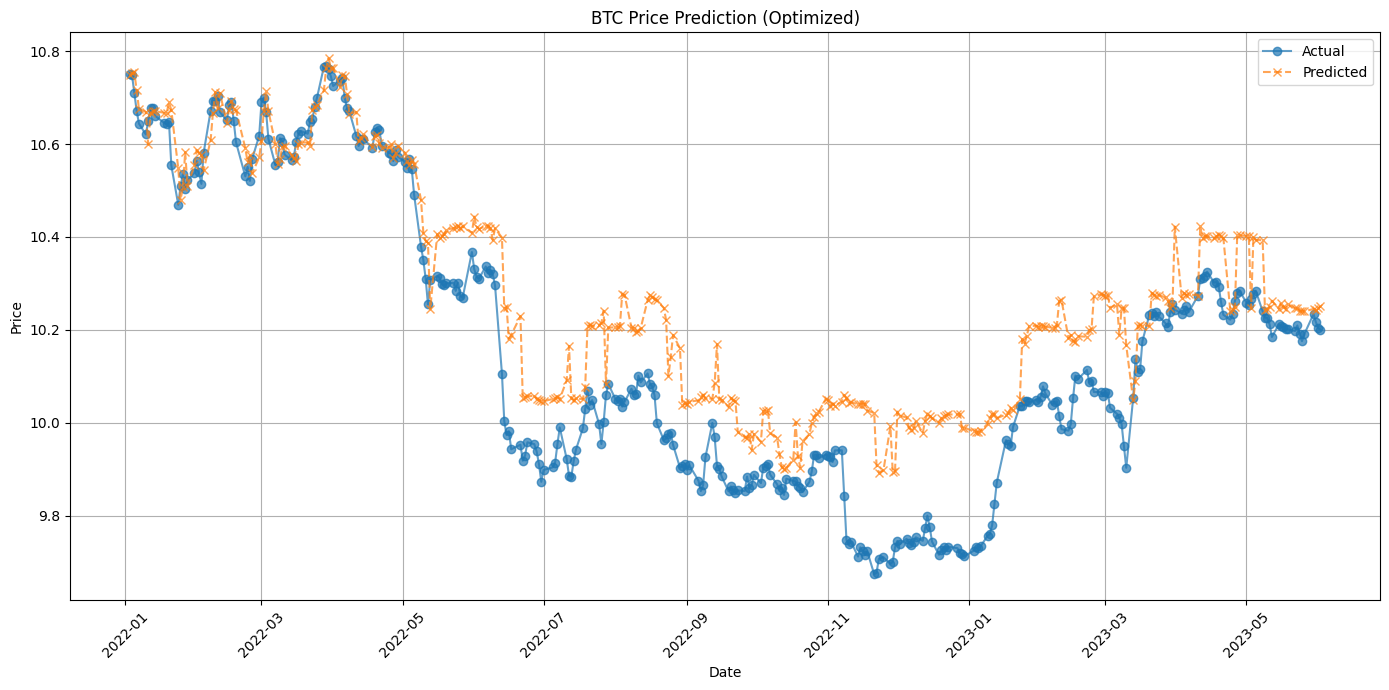

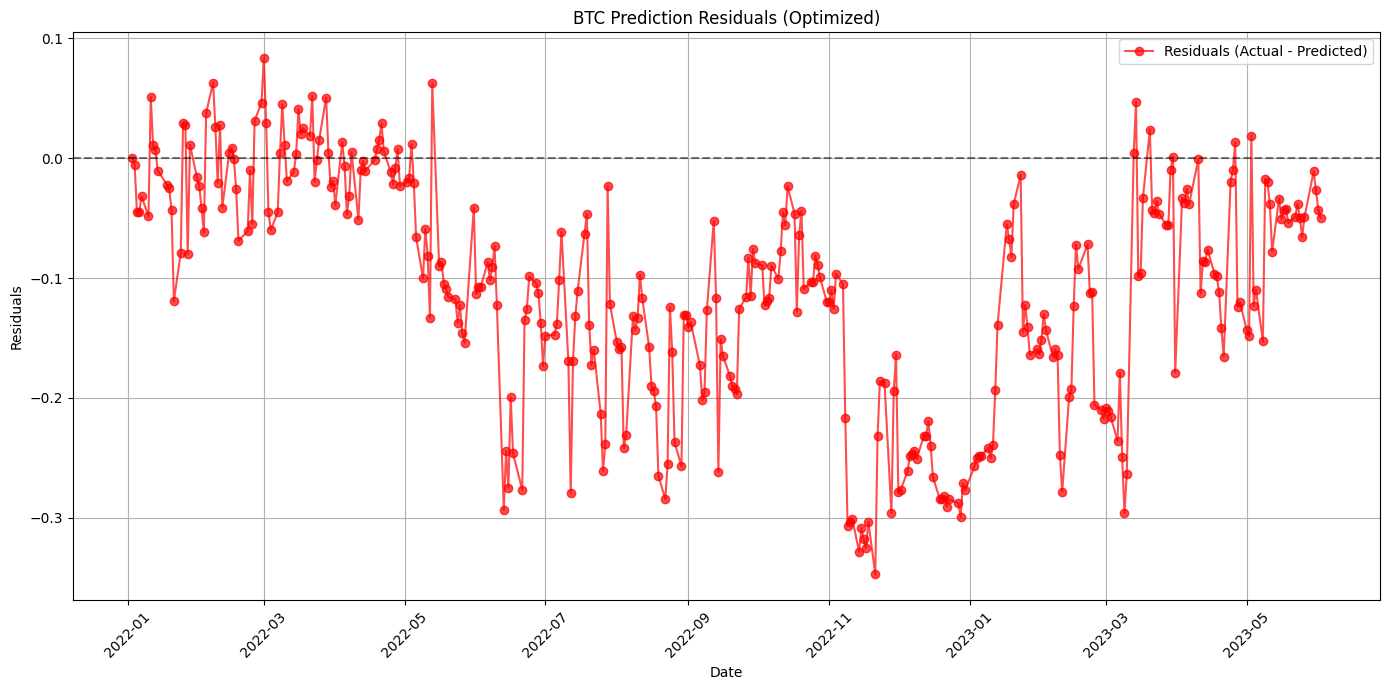

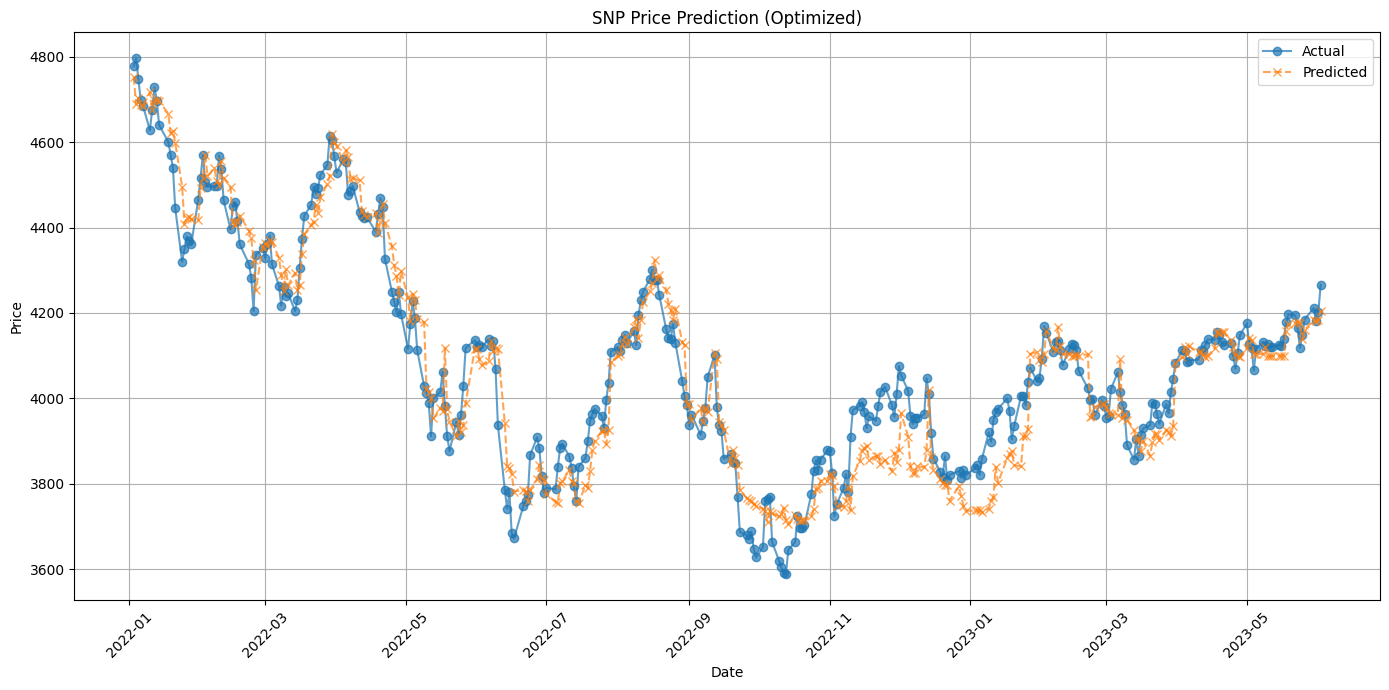

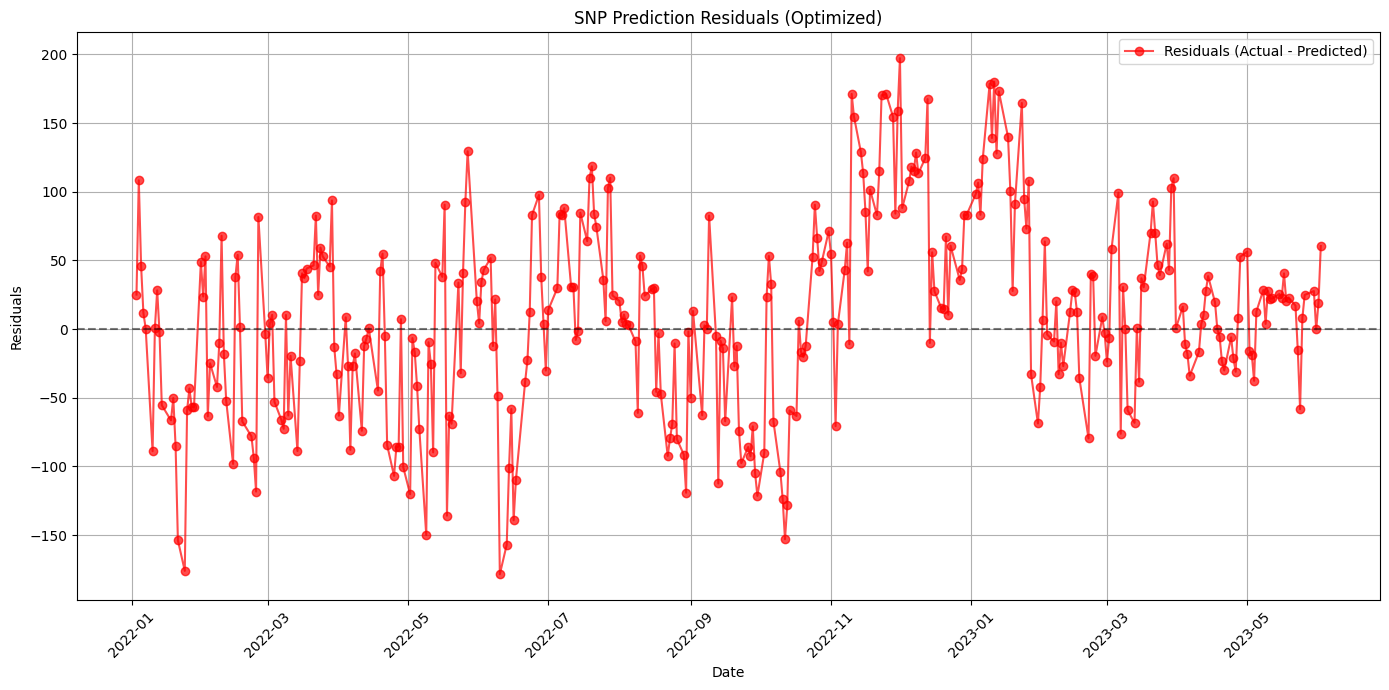

In [35]:
# 최적의 하이퍼파라미터
best_params_btc = {
    'n_estimators': 300,
    'learning_rate': 0.05,
    'max_depth': 5,
    'num_leaves': 31,
    'min_child_samples': 20,
    'subsample': 0.8,
    'random_state': 42
}

best_params_snp = {
    'n_estimators': 200,
    'learning_rate': 0.1,
    'max_depth': 5,
    'num_leaves': 31,
    'min_child_samples': 20,
    'subsample': 1.0,
    'random_state': 42
}

# 모델 생성
btc_model_optimized = LGBMRegressor(**best_params_btc)
snp_model_optimized = LGBMRegressor(**best_params_snp)

# 학습
btc_model_optimized.fit(X_train_btc, y_train_btc)
snp_model_optimized.fit(X_train_snp, y_train_snp)

# 예측
btc_preds_optimized = btc_model_optimized.predict(X_test_btc)
snp_preds_optimized = snp_model_optimized.predict(X_test_snp)

# 모델 평가
evaluate_model(y_test_btc, btc_preds_optimized, label="BTC (Optimized)")
# evaluate_model(y_test_snp, snp_preds_optimized, label="SNP (Optimized)")

# 예측 결과 시각화
btc_test_dates = test_data['Date']
snp_test_dates = test_data['Date']

plot_predictions_with_time(btc_test_dates, y_test_btc, btc_preds_optimized, title="BTC Price Prediction (Optimized)")
plot_residuals(btc_test_dates, y_test_btc, btc_preds_optimized, title="BTC Prediction Residuals (Optimized)")

plot_predictions_with_time(snp_test_dates, y_test_snp, snp_preds_optimized, title="SNP Price Prediction (Optimized)")
plot_residuals(snp_test_dates, y_test_snp, snp_preds_optimized, title="SNP Prediction Residuals (Optimized)")
